In [1]:
import pandas as pd
import pprint as pp

In [2]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
from inc import stop_words as sw
from inc import extra_stopwords as esw
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [7]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [8]:
from sqlalchemy import create_engine
table_name = 'Data_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [9]:
df = pd.read_sql_table(table_name, engine)

2020-12-17 01:41:30,451 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-17 01:41:30,452 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:41:30,453 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-17 01:41:30,454 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:41:30,455 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-17 01:41:30,456 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:41:30,458 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-17 01:41:30,458 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:41:30,461 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Data_set")
2020-12-17 01:41:30,462 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:41:30,465 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION A

In [10]:
df = df.rename(columns={"class": "label"})

In [11]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [12]:
train = df.sample(frac=0.8,random_state=100) #random state is a seed value
test = df.drop(train.index)

In [13]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [14]:
labels = model.predict(test.abstract)

In [15]:
pp.pprint(labels)

array([ 2, 15,  2, 15,  2, 15,  2,  2, 15, 15,  2,  2,  2, 15, 15, 15, 15,
        2,  2, 15, 12, 15,  2,  2, 15,  2,  2, 15, 15,  2,  2,  2, 15,  2,
       15, 12,  2, 15, 15,  2, 15,  2,  2,  2,  2,  2,  2, 15,  2,  2,  2,
        2,  2, 12,  2,  2, 15,  2,  2,  2, 12,  2,  2,  2, 15,  2,  2, 15,
        2, 15,  2, 15,  2, 15,  2, 15, 15,  2, 15, 15,  2,  2,  2,  2,  2,
       15, 15,  2,  2,  2,  2, 12, 12,  2,  2,  2, 15, 15,  2,  2, 15, 15,
        2, 12, 12, 15,  2,  2, 15,  2, 15, 12, 15,  2,  2, 15,  2, 15, 15,
       15,  2,  2, 15,  2,  2, 15,  2, 15, 15,  2, 12,  2,  2, 15, 15, 12,
       15,  2, 12, 15,  2,  2, 15, 12, 12, 15, 12, 15,  2, 15,  2])


In [16]:
conf_labels = list(range(2,18))

In [17]:
conf_labels = sorted(test.label.unique())

In [18]:
conf_labels

[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17]

In [19]:
set(labels)

{2, 12, 15}

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels, labels=conf_labels)

In [21]:
pp.pprint(mat)

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  7,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  8,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])


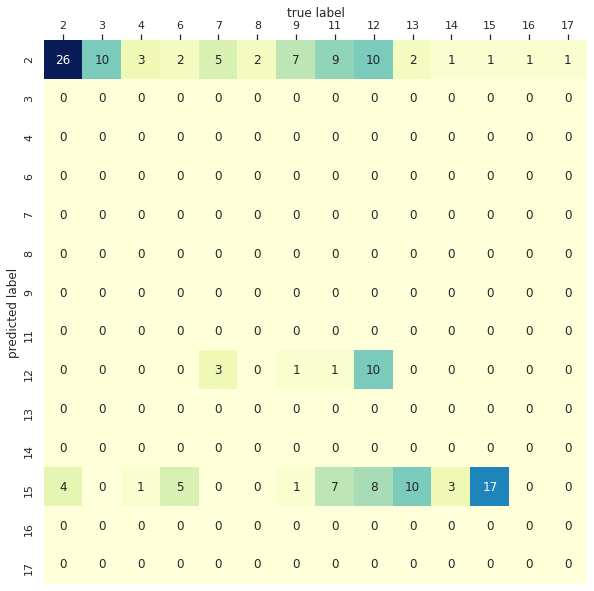

In [22]:
sns.set(style="white", color_codes=True)
plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

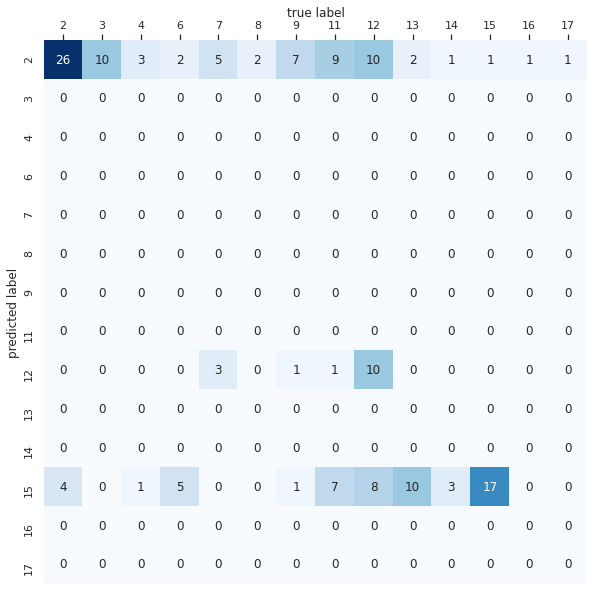

In [23]:
plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');